___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

Since the Data server was down, I used the locally saved data

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

The Data contains the stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [4]:
df=pd.read_pickle('all_banks')

In [7]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the multi-level indexed data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [18]:
max_Close=df.xs(key='Close',axis=1,level='Stock Info').max()
max_Close

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Let's see how the close proce has changed as a function of time **

In [77]:
df1=pd.DataFrame(max_Close)
tickers=list(df1.index)
returns=pd.DataFrame()

In [78]:
for i in tickers:
    returns[i+' Return']=df[i]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** To understand the relation of close price percent change with time, I create a pairplot using seaborn of the returns dataframe. 

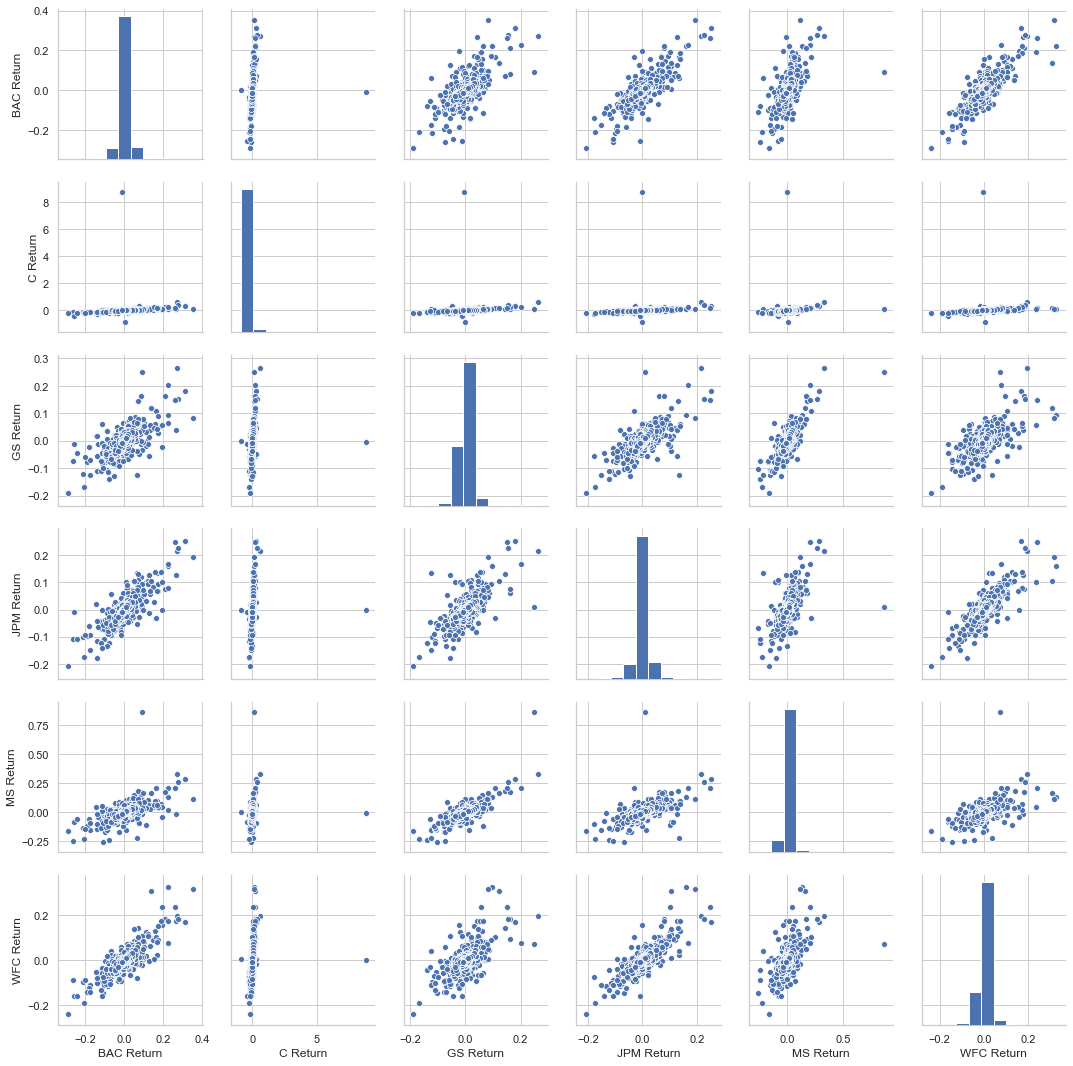

In [90]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(returns[1:])

* Citigroup stock stands out as it had way lesser percentage increase over time than the others

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [93]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [94]:
# Best Increase
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Citigroup's largest drop and biggest gain were very close to one another **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period?**

In [81]:
# Riskiest Stock
returns.std() # Citigroup 

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [122]:
#Riskiest of 2015 (Recent avaible data)
returns.loc['2015-01-01':'2015-12-31'].std() # Morgan Satnley

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

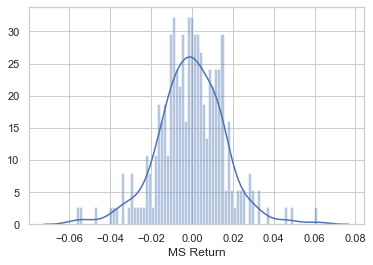

In [131]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=80)

** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

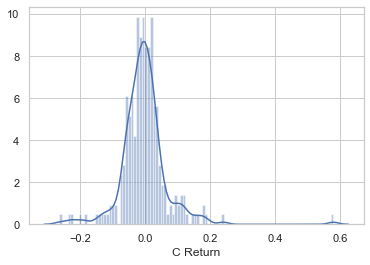

In [134]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=100)

____
# More Visualization


### Imports

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

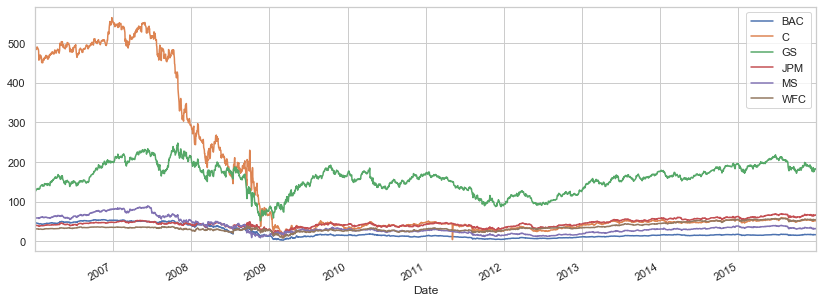

In [138]:
for i in tickers:
    df[i]['Close'].plot(figsize=(14,5),label=i)
plt.legend()

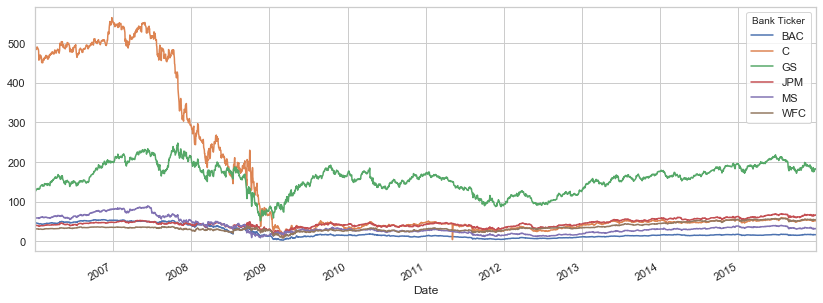

In [140]:
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(14,5))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

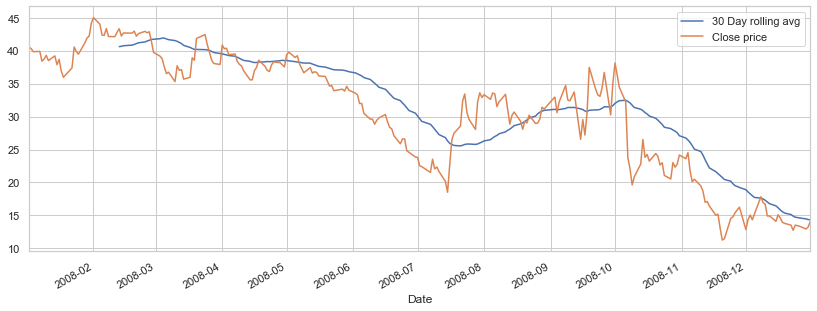

In [147]:
plt.figure(figsize=(14,5))
df['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day rolling avg')
df['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(label='Close price')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

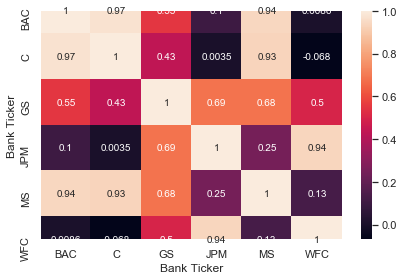

In [157]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.tight_layout()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

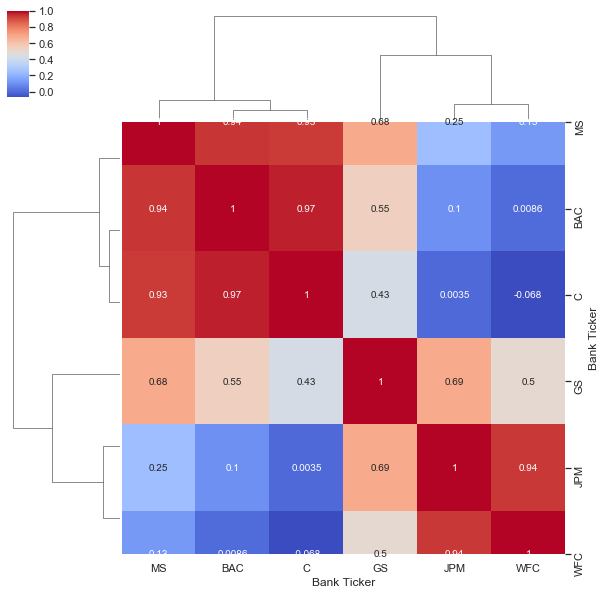

In [158]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')